In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [7]:
I0 = 3.3
angles = np.arange(0, 231, 10)
Intensity_experimental = [1.2, 0.8, 0.5, 0.4, 0.3, 0.7, 1.1, 1.7, 2.3, 2.6, 3.2, 3.1, 3.1, 3.3, 3.1, 2.8, 2.4, 1.7, 1.1, 0.6, 0.4, 0.4, 0.4, 0.8]
df = pd.DataFrame({'Angle': angles, 'Intensity_experimental': Intensity_experimental})
df['Intensity_malus'] = I0 * np.cos(np.radians(df['Angle']))**2
print(df)

    Angle  Intensity_experimental  Intensity_malus
0       0                     1.2     3.300000e+00
1      10                     0.8     3.200493e+00
2      20                     0.5     2.913973e+00
3      30                     0.4     2.475000e+00
4      40                     0.3     1.936519e+00
5      50                     0.7     1.363481e+00
6      60                     1.1     8.250000e-01
7      70                     1.7     3.860267e-01
8      80                     2.3     9.950718e-02
9      90                     2.6     1.237302e-32
10    100                     3.2     9.950718e-02
11    110                     3.1     3.860267e-01
12    120                     3.1     8.250000e-01
13    130                     3.3     1.363481e+00
14    140                     3.1     1.936519e+00
15    150                     2.8     2.475000e+00
16    160                     2.4     2.913973e+00
17    170                     1.7     3.200493e+00
18    180                     1

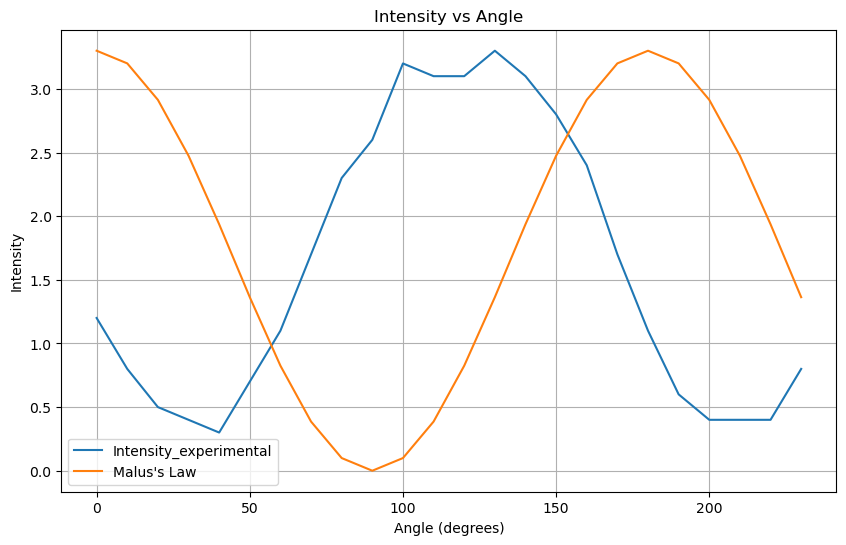

In [8]:
plt.figure(figsize=(10,6))
plt.plot(df['Angle'], df['Intensity_experimental'], label='Intensity_experimental')
plt.plot(df['Angle'], df['Intensity_malus'], label='Malus\'s Law')
plt.xlabel('Angle (degrees)')
plt.ylabel('Intensity')
plt.title('Intensity vs Angle')
plt.grid(True)
plt.legend()
plt.savefig("intensity_vs_angle_without_phase_shift.png")
plt.show()

The best fit parameters are: I0 = 3.5532159339696237, phase shift = 58.9630406897519 degrees.


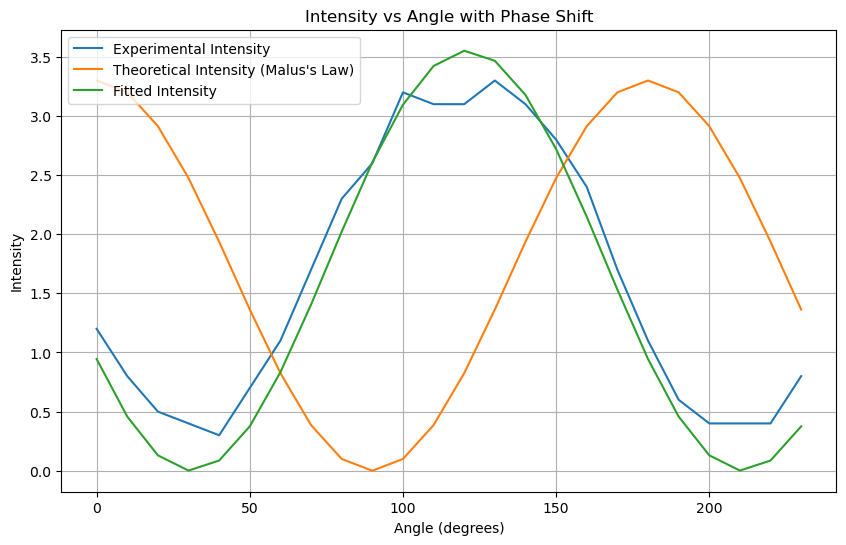

In [9]:
def fitting_func(x, I0, phase_shift):
    return I0 * np.cos(np.radians(x + phase_shift))**2

# Initial guess for the fit parameters (I0 and phase_shift)
initial_guess = [3, 0]
popt, pcov = curve_fit(fitting_func, df['Angle'], df['Intensity_experimental'], p0=initial_guess)
I0_fit, phase_shift_fit = popt

print(f"The best fit parameters are: I0 = {I0_fit}, phase shift = {phase_shift_fit} degrees.")

# Calculate the intensity using the fitted parameters
df['Intensity_fit'] = fitting_func(df['Angle'], I0_fit, phase_shift_fit)

plt.figure(figsize=(10,6))
plt.plot(df['Angle'], df['Intensity_experimental'], label='Experimental Intensity')
plt.plot(df['Angle'], df['Intensity_malus'], label='Theoretical Intensity (Malus\'s Law)')
plt.plot(df['Angle'], df['Intensity_fit'], label='Fitted Intensity')
plt.xlabel('Angle (degrees)')
plt.ylabel('Intensity')
plt.title('Intensity vs Angle with Phase Shift')
plt.grid(True)
plt.legend()
plt.savefig("intensity_vs_angle_with_phase_shift.png")
plt.show()
